# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [2]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
# Basic Information & Overview
print("Shape of the dataset:", df.shape)
print("\n Data Info: \n")
df.info()

# Summary statistics
df.describe(include = 'all')

Shape of the dataset: (144, 3)

 Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


,year,month,passengers
count,144.000000,144,144.000000
unique,NaN,12,NaN
top,NaN,Jan,NaN
freq,NaN,12,NaN
mean,1954.500000,NaN,280.298611
std,3.464102,NaN,119.966317
min,1949.000000,NaN,104.000000
25%,1951.750000,NaN,180.000000
50%,1954.500000,NaN,265.500000
75%,1957.250000,NaN,360.500000


# Data Cleaning

In [4]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum()/len(df)) * 100
})

missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
year,0,0.0
month,0,0.0
passengers,0,0.0


In [5]:
# Handle missing values (this dataset usually has none, but for generalization)
df['passengers'] = df['passengers'].fillna(df['passengers'].mean())
df['month'] = df['month'].fillna(df['month'].mode()[0])
df['year'] = df['year'].fillna(df['year'].mode()[0])

# No column to drop
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
## Convert some columns to category type
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    category
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(2), int64(1)
memory usage: 2.3 KB


# Analysis with their Insights

--- Statistical Summary ---
       passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
------------------------------


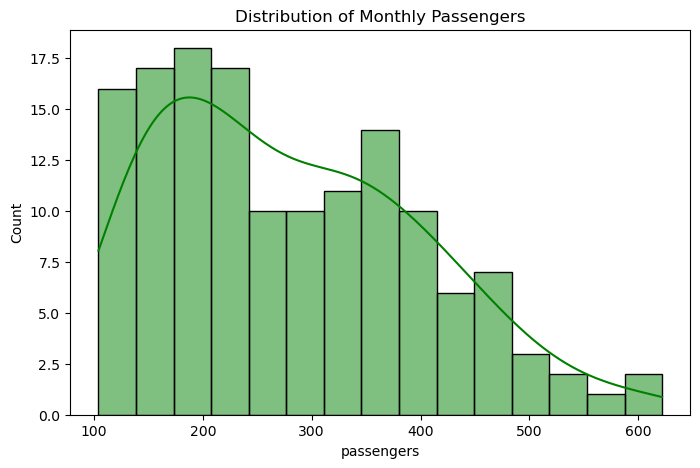

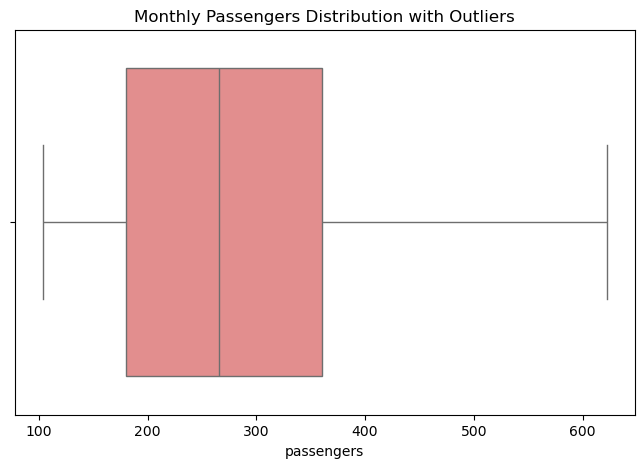

In [7]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("--- Statistical Summary ---")
print(df[num_cols].describe())
print("-" * 30)

# 2. Histogram : Passengers
plt.figure(figsize=(8, 5))
sns.histplot(df['passengers'], bins=15, kde=True, color='green')
plt.title("Distribution of Monthly Passengers")
plt.show()

# 3. Boxplot : Passengers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['passengers'], color='lightcoral')
plt.title("Monthly Passengers Distribution with Outliers")
plt.show()

<Figure size 600x400 with 0 Axes>

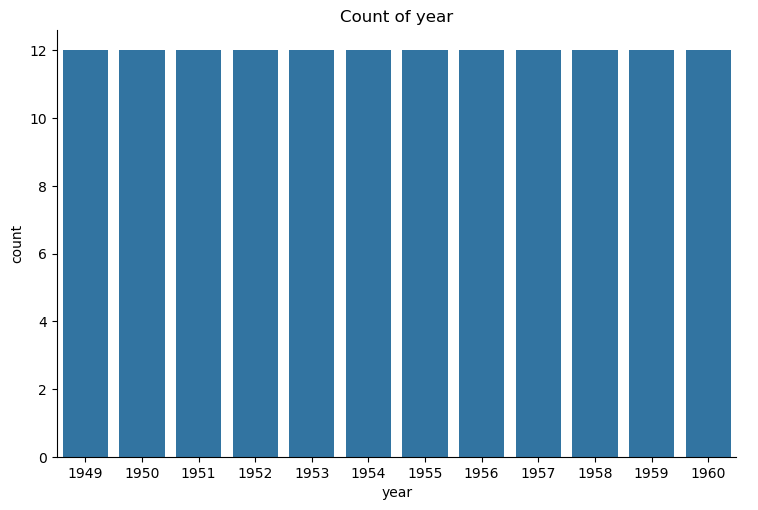

<Figure size 600x400 with 0 Axes>

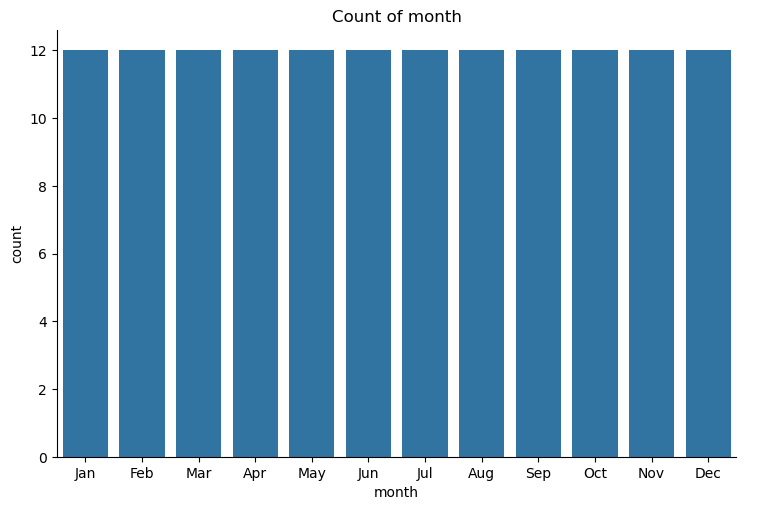

In [ ]:
# Univariate Analysis - Categorical Features

df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')


cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.catplot(x=col, data=df, kind='count', aspect=1.5)
    plt.title(f"Count of {col}")
    plt.show()

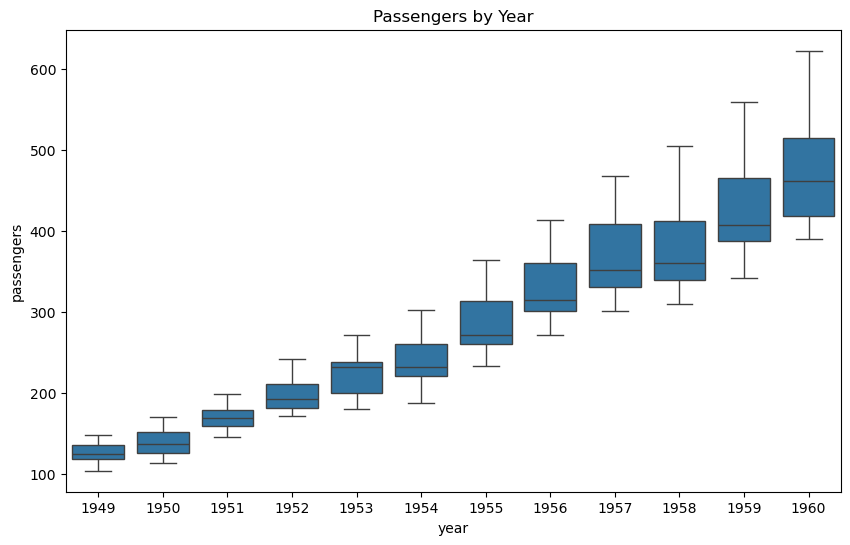

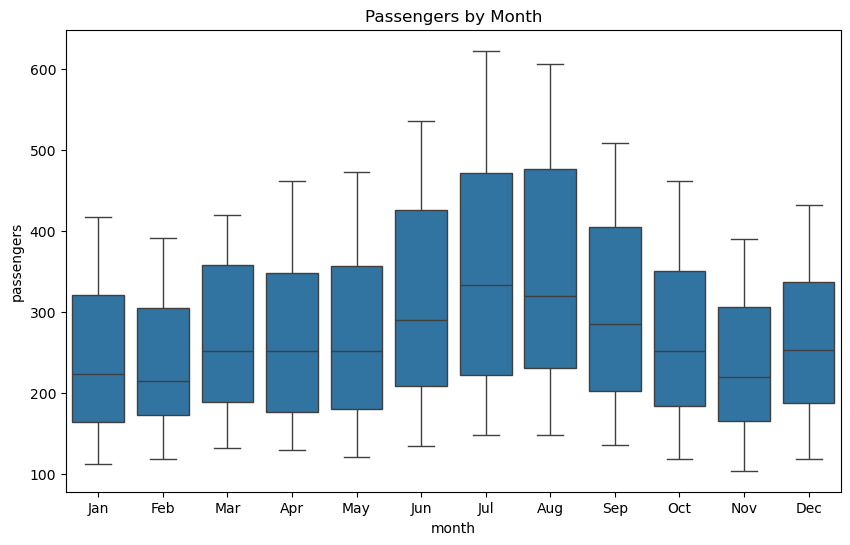

In [9]:
# Bivariate Analysis - Numerical vs Categorical

# Boxplot: Passengers by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='passengers', data=df)
plt.title("Passengers by Year")
plt.show()

# Boxplot: Passengers by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='passengers', data=df)
plt.title("Passengers by Month")
plt.show()

<Figure size 1200x600 with 0 Axes>

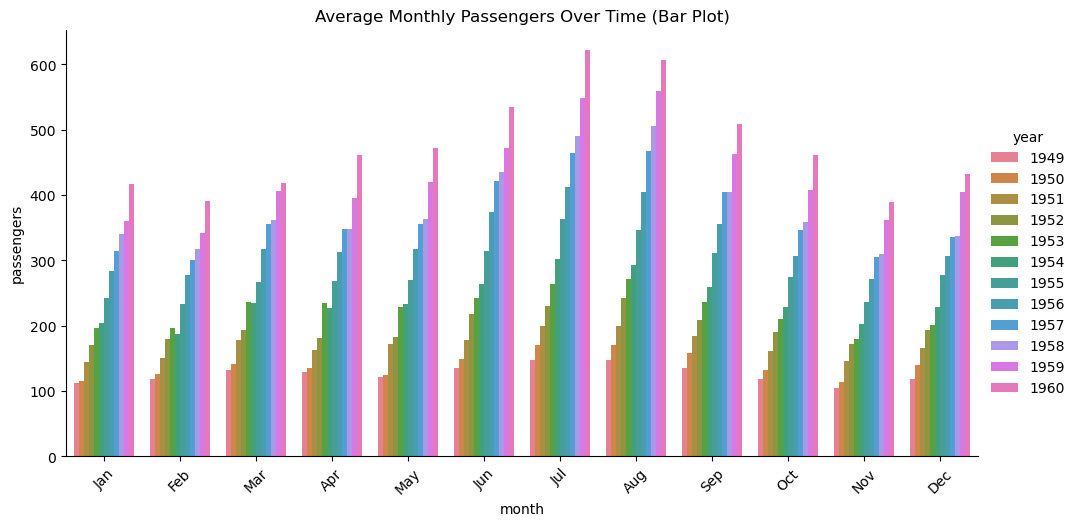

<Figure size 1000x600 with 0 Axes>

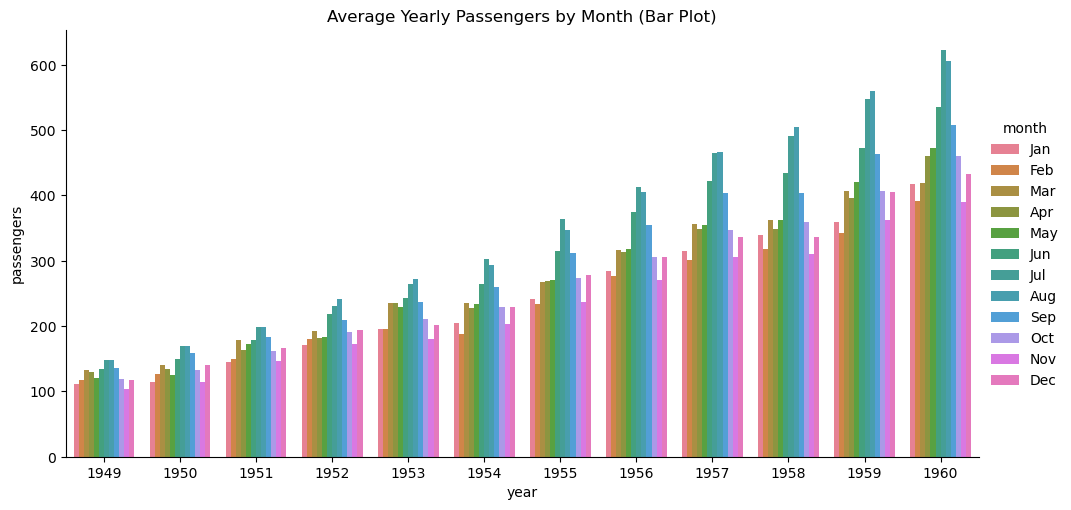

In [10]:
# Catplot: Monthly Passenger Count over the Years
plt.figure(figsize=(12, 6))
# Using kind='bar' to visualize the mean (or sum) of 'passengers' by month, grouped by year.
sns.catplot(x='month', y='passengers', hue='year', kind='bar', data=df, aspect=2)
plt.title("Average Monthly Passengers Over Time (Bar Plot)")
plt.xticks(rotation=45)
plt.show()

# Catplot: Yearly Passenger Count by Month
plt.figure(figsize=(10, 6))
sns.catplot(x='year', y='passengers', hue='month', kind='bar', data=df, aspect=2)
plt.title("Average Yearly Passengers by Month (Bar Plot)")
plt.show()

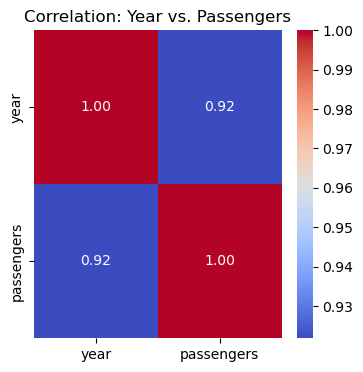

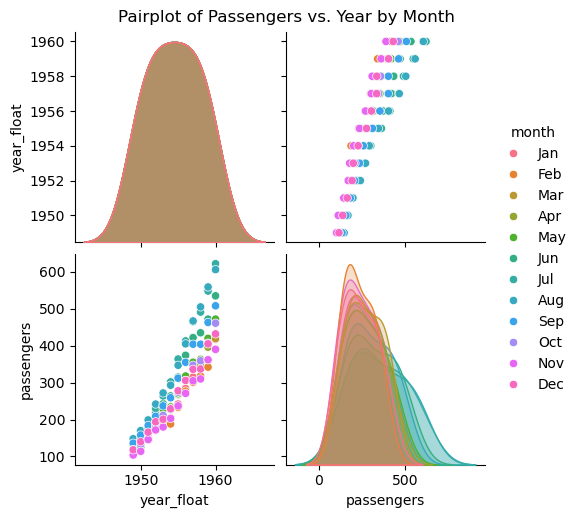

In [13]:
df['year_float'] = df['year'].astype(float) 

# 1. Correlation Heatmap (unchanged, as it works on integers)
num_cols = ['year', 'passengers']
corr = df[num_cols].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Year vs. Passengers")
plt.show()

# 2. Pairplot (using the new float column)
sns.pairplot(df, vars=['year_float', 'passengers'], hue='month')
plt.suptitle("Pairplot of Passengers vs. Year by Month", y=1.02)
plt.show()

### Insights:
1. Year vs. Passengers: There is an extremely strong positive correlation (+0.92) between the year and the number of passengers, confirming a consistent and rapid increase in air travel over the decade.

2. Monthly Cycles: The scatter plot shows a clear cyclical pattern in passenger counts, with the highest traffic consistently occurring in the summer months (July, August, September), regardless of the year.

Number of outliers in passengers:  0
----------------------------------------


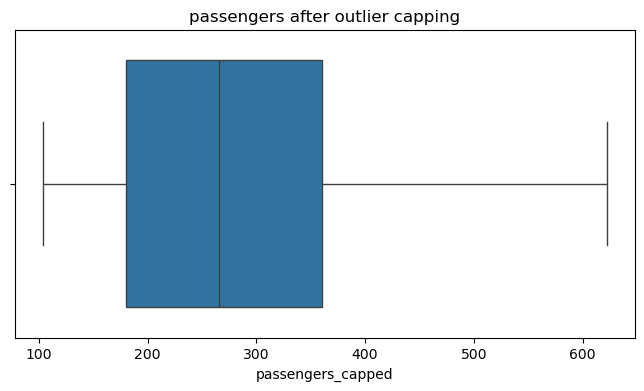

In [14]:
df = sns.load_dataset('flights')

column = 'passengers'

# Outlier Detection using IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower) | (df[column] > upper)]

print("Number of outliers in passengers: ", len(outliers))
print("-" * 40)

# Outlier Capping and Visualization
df[f'{column}_capped'] = df[column].clip(lower, upper)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[f'{column}_capped'])
plt.title(f"{column} after outlier capping")
plt.show()

C:\Users\PanasaKamal\AppData\Local\Temp\ipykernel_27328\240927923.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='passengers', data=df, palette='cividis')


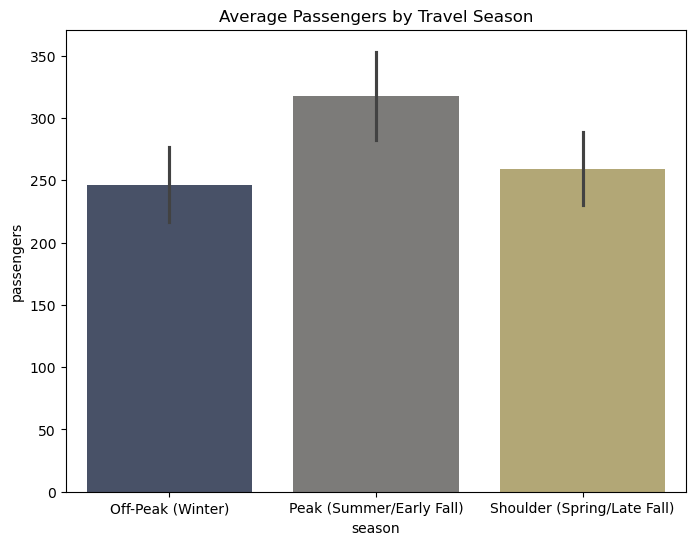

In [15]:
# --- Feature Engineering ---
# Define a function to map months to seasons
def get_season(month):
    if month in ['May', 'Jun', 'Jul', 'Aug', 'Sep']:
        return 'Peak (Summer/Early Fall)'
    elif month in ['Mar', 'Apr', 'Oct', 'Nov']:
        return 'Shoulder (Spring/Late Fall)'
    else:
        return 'Off-Peak (Winter)'

df['season'] = df['month'].apply(get_season).astype('category')

# --- Visualization ---
# Visualize the average passengers across the new season feature
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='passengers', data=df, palette='cividis')
plt.title("Average Passengers by Travel Season")
plt.show()

In [16]:
df.to_csv("Flights_cleaned_fe.csv", index=False)
print("\nCleaned Flights data saved as Flights_cleaned_fe.csv")


Cleaned Flights data saved as Flights_cleaned_fe.csv
